<a href="https://colab.research.google.com/github/rpizarrog/simulacion/blob/main/Caso_11_M%C3%A9todo_montecarlo_ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Simular el método montecarlo

# Descripción

Simular el tiro al blanco en el círculo de radi igual a 1 y centro coordenada en 1,1



# Desarrollo


## Cargar librerías



In [52]:
import random
import math as mt
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm


## Crear funciones



In [54]:
def f_visualizar_tiros(x1, y1, adentro):
  tiros = pd.DataFrame({'x': x1, 'y': y1, 'adentro':adentro})
  # print(tiros)

  # Centro y radio del círculo
  centro = (1, 1)
  radio = 1

  # Crear un conjunto de puntos para el círculo
  theta = np.linspace(0, 2*np.pi, 100)
  x = centro[0] + radio * np.cos(theta)
  y = centro[1] + radio * np.sin(theta)

  # Crear la figura y el gráfico
  fig, ax = plt.subplots()
  ax.plot(x, y)
  ax.set_aspect('equal', adjustable='box')
  ax.set_xlim(0, 2)
  ax.set_ylim(0, 2)
  ax.set_xlabel('Eje X')
  ax.set_ylabel('Eje Y')

  # Marcar el centro del círculo
  ax.plot(centro[0], centro[1])

  colors = ['green' if a == 1 else 'red' for a in adentro]
  # Agregar los puntos generados
  ax.scatter(x1, y1, c=colors, s=5)

  # Mostrar la leyenda
  ax.legend()

  # Mostrar el gráfico
  plt.show()

def f_monte_carlo_pi(n):
  aciertos = 0
  x = []
  y = []
  adentro = []
  for t in range(n):
    x_coord = random.uniform(0, 2)
    y_coord = random.uniform(0, 2)
    x.append(x_coord)  # Genera x aleatorio entre 0 y 2
    y.append(y_coord)  # Genera y aleatorio entre 0 y 2
    distancia = mt.sqrt((x_coord-1)**2+(y_coord-1)**2) # Distancia conforme a formula de distancia
    # print("distancia y coordenada ", distancia, x, y)

    if distancia <= 1:
      aciertos += 1
      adentro.append(1)
    else:
      adentro.append(0)

  prob = aciertos / n
  pi_aprox= (aciertos / n) * 4  # Probabilidad * 4 da un valor aproximado de pi
  f_visualizar_tiros(x, y, adentro)
  return aciertos, prob, pi_aprox

# # Función para simular una compra
def f_simular_compra(num_articulos, media_precio, desviacion_precio):
    return [random.normalvariate(media_precio, desviacion_precio) for _ in range(num_articulos)]

def f_visualizar_compras(media1, desv1, media2, desv2):
  # Crear datos para las dos distribuciones
  datos1 = np.random.normal(media1, desv1, 1000)
  datos2 = np.random.normal(media2, desv2, 1000)

  print (datos1)

  # Crear un rango de valores para el eje x
  x = np.linspace(0, 10, 1000)

  # Calcular las densidades de probabilidad para las dos distribuciones
  densidad1 = norm.pdf(datos1, media1, desv1)
  # densidad2 = norm.pdf(x, media2, desv2)

  print (densidad1)

  # Crear el gráfico
  plt.figure(figsize=(10, 6))
  plt.plot(x, densidad1, label=f'Media: {media1}, Desviación Estándar: {desv1}')
  # plt.plot(x, densidad2, label=f'Media: {media2}, Desviación Estándar: {desv2}')
  plt.legend()
  plt.title('Distribuciones de Densidad')
  plt.xlabel('Valores')
  plt.ylabel('Densidad de Probabilidad')
  plt.grid(True)
  plt.show()

In [ ]:
# Crear datos para las dos distribuciones
media1, desviacion_estandar1 = 0, 1
media2, desviacion_estandar2 = 2, 0.5



##  Tiro al blanco

En un círculo de radio igual a 1 con centro en coordenada (1,1) inscrito en un cuadrado de lado igual a 2.

Determina el valor de pi aproximado con un asimulación de valores aleatorios uniformente entre 0 y 2.

Simule con diversos valroes de generación de números aleatorios



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


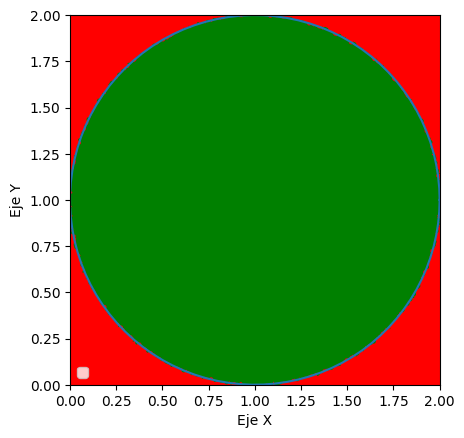

Aciertos =  785373  de entre  1000000  tiros;  probabilidad es  0.785373
Estimación de pi con 1000000 muestras:  3.141492


In [63]:
# Simular tiro al blanco

# Probar las funciones
n = 1000000 #  0000000 #00000  # Número de puntos aleatorios generados
aciertos, prob, pi_aprox = f_monte_carlo_pi(n)
# print ("Aciertos  = ", )
print ("Aciertos = ", aciertos, " de entre ", n , " tiros; ", "probabilidad es ", prob)
print(f"Estimación de pi con {n} muestras: ", pi_aprox)


## Compra de artículos

Se simula n compras de 5 artículo determinando la media de todas las comrpas en una generación aleatoria de comrpas bajo la distribución  norma


In [69]:
# Compras de productos

# Parámetros de la simulación
num_compras = 1000  # Número de compras simuladas
num_articulos = 5   # Número de artículos en cada compra
media_precio = 50   # Media del precio de un artículo
desviacion_precio = 10  # Desviación estándar del precio de un artículo

# Realizar la simulación de Montecarlo
costos_promedio = []
for _ in range(num_compras):
    compra = f_simular_compra(num_articulos, media_precio, desviacion_precio)
    # print ("compra", compra)

    costo_promedio_compra = np.mean(compra)
    # print("costo promedio compra", costo_promedio_compra)

    costos_promedio.append(costo_promedio_compra)

# Calcular la estimación de Montecarlo del costo promedio
estimacion_costo_promedio = np.mean(costos_promedio)
estimacion_costo_desv_std = np.std(costos_promedio)

print ("Precio promedio inicial", media_precio)
print ("Desviación estándar inicial ", desviacion_precio)
print("\n")

print(f"Estimación Montecarlo del costo promedio de una compra: {estimacion_costo_promedio}")
print(f"Desviación estándar de: {estimacion_costo_desv_std}")


# Pendiente ...
# f_visualizar_compras(media_precio, desviacion_precio, estimacion_costo_promedio, estimacion_costo_desv_std)

Precio promedio inicial 50
Desviación estándar inicial  10


Estimación Montecarlo del costo promedio de una compra: 49.99159511237279
Desviación estándar de: 4.410918118626891


# Simular casos de contagio

Simular bajo una condición aleatoria casos de contagio (por ejemplo COVID) usando método de Motecarlo.

pendiente ...

Representar visualmente.






## Simular manos de póker con dos jugadores

Simular mano de póker con dos jugadores

pendiente ...
Representar visualmente.

## Simular productos defecutuosos de un proceso de fabricación

En un proceso de fabricación de productos, existe cierta cantidad de productos defectuosos que se comportan bajo una distribución tal vez (hipergeometrica).

Simular mediante método de motencarlo y unacondición de aleatoriedad la cantidad de productos defectuosos.


Pendiente ...



## Simular comportamiento de votaciones

Simular comportamiento de votaciones en un proceso de elección.

Representar visualmente.



## Simular resultados deportivos

Simular bajo el método de motencarlo resutlados deportivos basado en historia de ganados y perdidos.

Representar visualmente.

# Interpretación

Pendiente